In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")


📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [2]:
df.head() # 연령대코드 값 확인

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [3]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [4]:
df['연령대'] = df['연령대코드(5세단위)'].map(age_code) # age_code에 매핑해서 새로운 연령대 컬럼 추가

In [5]:
df.head() #확인

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세


In [6]:
df.groupby(['연령대'])['허리둘레'].describe() # 기술통계값 출력

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [7]:
df_small = df[['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']] # 필요한 컬럼만 모아 새 데이터프레임으로

df_corr = df_small.corr() # 상관계수
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


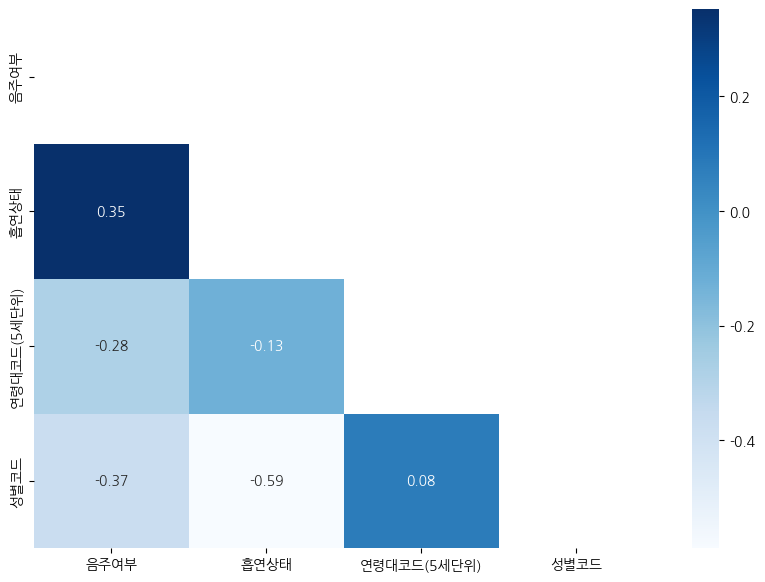

In [8]:
mask = np.triu(np.ones_like(df_corr, dtype=bool)) # 대각선 위를 true, 아래를 false로 만드는 mask

plt.figure(figsize=(10,7))
sns.heatmap(df_corr, annot=True, cmap='Blues', fmt='.2f', mask=mask) #mask적용
plt.show()

In [ ]:
# 성별에 따른 음주와 흡연은 음의 상관관계가 있으며, 남성일수록 음주 및 흡연의 가능성이 높다
# 흡연상태와 음주여부는 양의 상관관계가 있다.(흡연하고 있을 수록 음주도 하고있을 가능성이 높다)

📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

In [9]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df["흡연"] = df["흡연상태"].map(smoke)
df["음주"] = df["음주여부"].map(drink)

# crosstab 으로 교차표 만들어보기
drink_or_smoke = pd.crosstab(df["음주"], df["흡연"])
drink_or_smoke

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


In [10]:
 drink_or_smoke.info() #구조 확인해보기

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 마심 to 안마심
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   끊음      2 non-null      int64
 1   흡연안함    2 non-null      int64
 2   흡연중     2 non-null      int64
dtypes: int64(3)
memory usage: 64.0+ bytes


<Axes: xlabel='흡연', ylabel='count'>

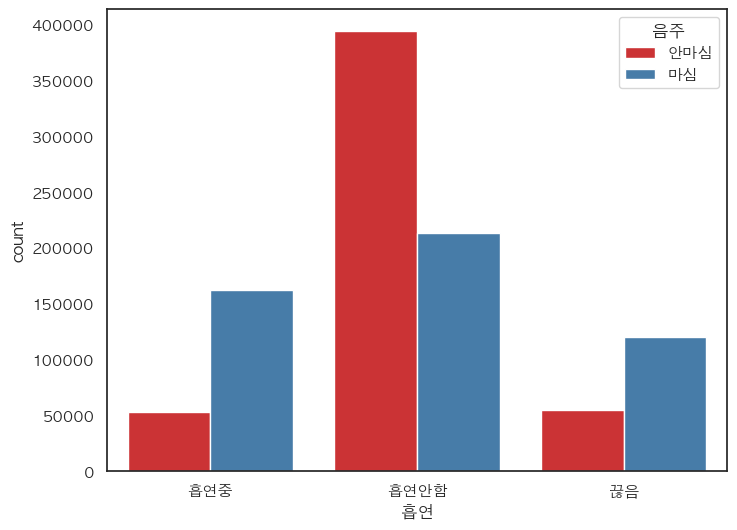

In [11]:
#막대그래프로 시각화
plt.figure(figsize=(8, 6))
sns.set(font_scale=1, font='AppleGothic', style='white')
sns.countplot(data=df, x='흡연', hue='음주', palette='Set1')

In [12]:
# 흡연하지 않는 사람의 경우 음주도 하지 않는 경우가 더 많으며, 흡연 중인 사람은 음주도 하는 경우가 더 많다

📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

<Figure size 1000x1000 with 0 Axes>

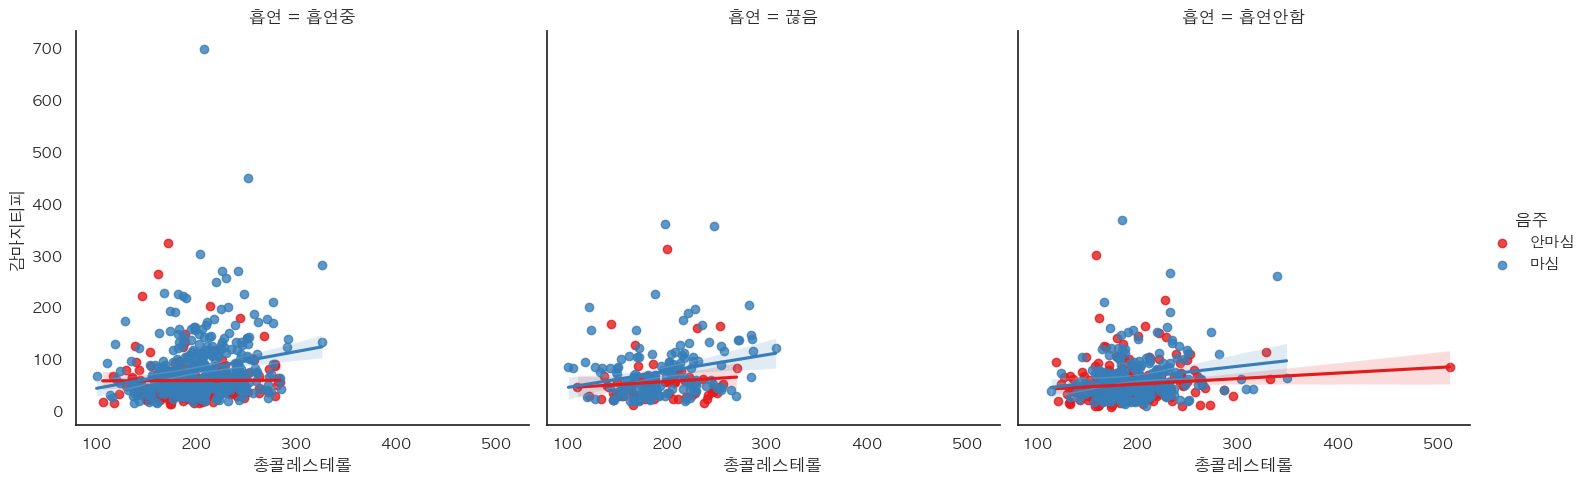

In [13]:
# 체중 120kg 이상으로 새 데이터프레임
df_fat = df[df['체중(5Kg 단위)']>=120]

#lmplot으로 산점도와 회귀선 출력
plt.figure(figsize=(10,10))
sns.lmplot(data=df_fat,x='총콜레스테롤',y='감마지티피',hue='음주',col='흡연', palette='Set1') 

📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

In [22]:
df[df['시력(좌)']==9.9].head() #좌, 우 실명은 각각 기록 되어있다. 

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
529,2017,530,2,12,41,150.0,55.0,80.0,9.9,0.9,...,1,NaN,NaN,NaN,NaN,0.0,20181126,55~59세,흡연안함,안마심
890,2017,891,1,9,44,170.0,70.0,82.0,9.9,0.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,40~44세,흡연안함,안마심
1172,2017,1173,1,16,11,160.0,50.0,80.0,9.9,0.6,...,0,NaN,NaN,NaN,NaN,NaN,20181126,75~79세,흡연안함,안마심
1230,2017,1231,1,10,29,145.0,35.0,59.0,9.9,0.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,45~49세,흡연안함,안마심
1360,2017,1361,2,18,47,160.0,50.0,84.0,9.9,9.9,...,0,NaN,NaN,NaN,NaN,NaN,20181126,85세+,흡연안함,안마심


In [15]:
# 실명 제외
df_eyesight_left = df[df['시력(좌)']!=9.9]
df_eyesight_right = df[df['시력(우)']!=9.9]

# 시각화를 위해 연령대로 정렬
df_eyesight_left_sorted = df_eyesight_left.sort_values('연령대')
df_eyesight_right_sorted = df_eyesight_right.sort_values('연령대')

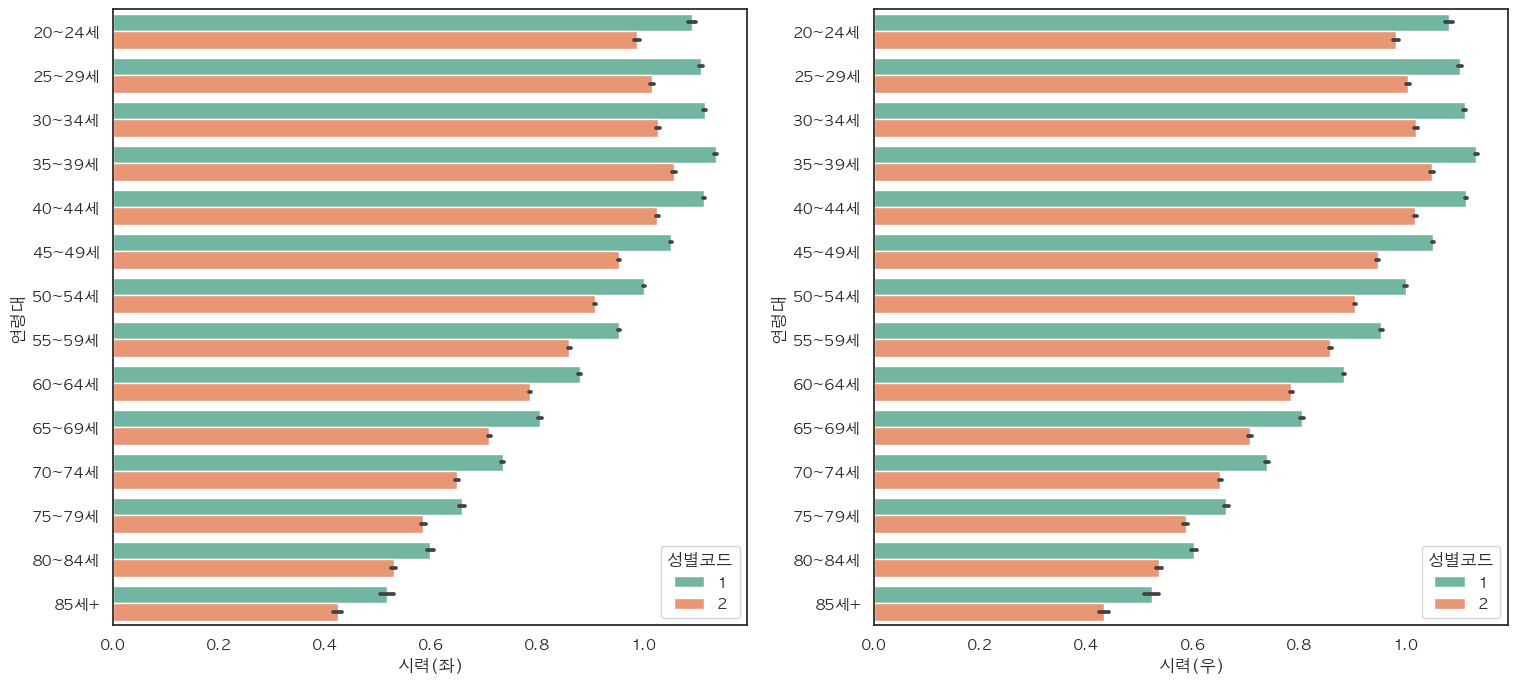

In [20]:
plt.figure(figsize=(18, 8))

# 첫 번째 barplot(좌)
plt.subplot(1, 2, 1)
sns.barplot(data=df_eyesight_left_sorted, x='시력(좌)', y='연령대', hue='성별코드', orient='h', palette='Set2')

# 두 번째 barplot(우)
plt.subplot(1, 2, 2)
sns.barplot(data=df_eyesight_right_sorted, x='시력(우)', y='연령대', hue='성별코드', orient='h', palette='Set2')

plt.show()

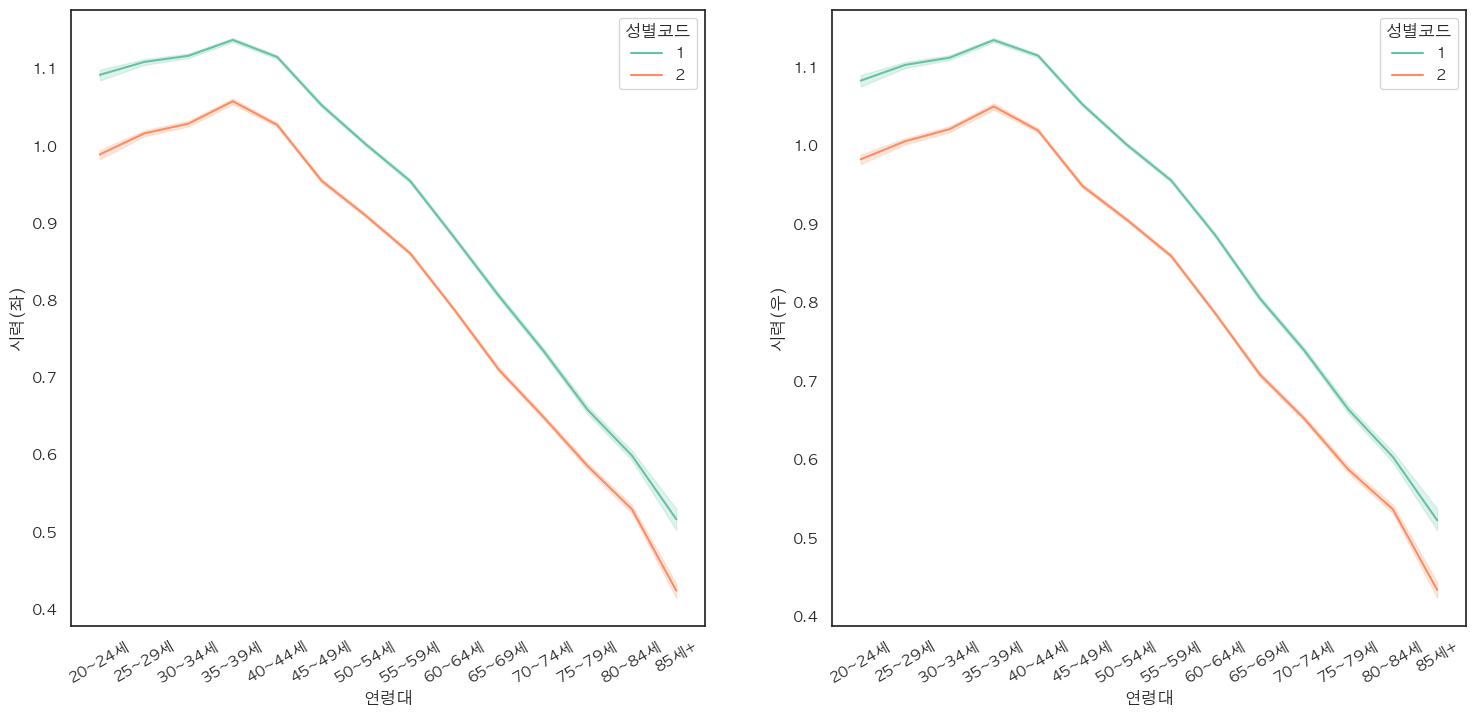

In [21]:
# 꺾은선 그래프로 추세 간단하게 확인

plt.figure(figsize=(18, 8))

# 첫 번째 lineplot(좌)
plt.subplot(1, 2, 1)
sns.lineplot(data=df_eyesight_left_sorted, x='연령대', y='시력(좌)', hue='성별코드', palette='Set2')
plt.xticks(rotation=30) #x축이 겹쳐서 글자 회전 30도

# 두 번째 lineplot(우)
plt.subplot(1, 2, 2)
sns.lineplot(data=df_eyesight_right_sorted, x='연령대', y='시력(우)', hue='성별코드', palette='Set2')
plt.xticks(rotation=30)

plt.show()

In [19]:
# 35~39세 까지는 시력이 상승하는 모습을 보이다 이후로는 쭉 감소한다. 
# 평균시력은 전연령층에서 남성이 여성보다 높았다. 좌우시력은 유사한 추세를 보인다.  